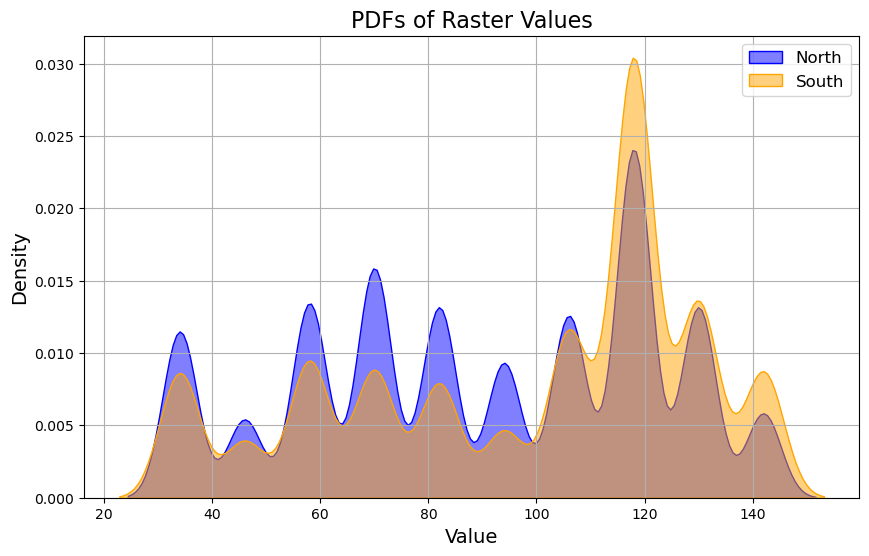

In [13]:
import numpy as np
import rasterio
import seaborn as sns
import matplotlib.pyplot as plt

# Load raster data
def load_raster(file_path):
    with rasterio.open(file_path) as src:
        raster = src.read(1)  # Read the first band
        nodata_value = src.nodata  # Get NoData value if available
    return raster, nodata_value

# File paths to your raster datasets
raster1_path = "northrasters/north2023.tif"
raster2_path = "southrasters/south2023.tif"

# Load the rasters
raster1, nodata1 = load_raster(raster1_path)
raster2, nodata2 = load_raster(raster2_path)

# Flatten the rasters and remove NoData values
raster1_values = raster1.flatten()
raster2_values = raster2.flatten()

if nodata1 is not None:
    raster1_values = raster1_values[raster1_values != nodata1]  # Remove NoData
if nodata2 is not None:
    raster2_values = raster2_values[raster2_values != nodata2]  # Remove NoData

# Plot the PDFs using Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(raster1_values, label="North", fill=True, color="blue", alpha=0.5)
sns.kdeplot(raster2_values, label="South", fill=True, color="orange", alpha=0.5)

# Add titles and labels
plt.title("PDFs of Raster Values", fontsize=16)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# Show the plot
plt.show()


In [16]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load raster and remove NoData values
def load_raster_values(raster_path):
    with rasterio.open(raster_path) as src:
        raster_data = src.read(1)  # Read the first band
        nodata_value = src.nodata  # Get the NoData value
        if nodata_value is not None:
            raster_data = raster_data[raster_data != nodata_value]  # Remove NoData values
    return raster_data

# File paths to your raster datasets
raster1_path = "northrasters/north2023.tif"
raster2_path = "southrasters/south2023.tif"

# Load the raster data
raster1_values = load_raster_values(raster1_path)
raster2_values = load_raster_values(raster2_path)

# Create a DataFrame for plotting (using Seaborn)
import pandas as pd

data = pd.DataFrame({
    'Raster 1': raster1_values,
    'Raster 2': raster2_values
})

# Create box plots side by side
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Raster Values')
plt.ylabel('Value')
plt.show()


ValueError: All arrays must be of the same length

In [2]:
import rasterio

# Path to your raster file
raster_path = "southrasters/south2023.tif"

# Open the raster and get its metadata
with rasterio.open(raster_path) as src:
    # Get the number of rows (height) and columns (width)
    num_rows = src.height
    num_cols = src.width
    
    # Total number of cells
    total_cells = num_rows * num_cols

print(f"Total number of cells: {total_cells}")

Total number of cells: 2087988
